## Objective:
The database contains retails data for a hypothetical company accross Australia and North America. The general task is to conduct meaningful data analysis on the data and generate business insights to help the company optimize their decision.
Here are some objective of this project:

1 Compare the sales and gross profits generation performance among different states and between different chains.

2 Compare the Sales and gross profits generation performance of different categories.

3 Find out the manager with highest sales, gross profits, ROI.

4 Find out the trend and seasonality of total sales and total gross profits.

In [1]:
import pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Driver setup

In [2]:
myDataSources = pyodbc.dataSources()

In [3]:
myDataSources = pyodbc.dataSources()
access_driver = myDataSources['MS Access Database']
driver = access_driver

In [4]:
filepath= r'C:\Users\30523\Course work\Retail.accdb'

### Connect to the database

In [5]:
# create a connection to the database
conn = pyodbc.connect(driver = driver, dbq = filepath, autocommit = True)
crsr = conn.cursor()

In [6]:
# grab all the tables
tables_list = list(crsr.tables())

In [7]:
tables_list

[('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysAccessStorage', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysAccessXML', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysACEs', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysComplexColumns', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysIMEXColumns', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysIMEXSpecs', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysNameMap', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysNavPaneGroupCategories', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysNavPaneGroups', 'SYSTEM TABLE', None),
 ('C:\\Users\\30523\\Course work\\Retail.accdb', None, 'MSysNavPaneGroupToObjects', 'SYSTEM TABLE', None),
 ('C:\\Users\\305

### Take a look at these 5 tables

In [8]:
# Category table, which connects category with buyers
pd.read_sql("""SELECT * FROM Category;""",conn)

,Category,Buyer
0,Accessories,Maggie Mayer
1,Groceries,Chris Monroe
2,Home,Richard Carr
3,Hosiery,Ella Hickman
4,Intimate,Sara Ferrell
5,Juniors,Chester George
6,Kids,Elizabeth Gentry
7,Mens,Bruce Curran
8,Shoes,Howard Wright
9,Womens,Amy Buchanan


In [9]:
# The Transaction table records records of purchases
pd.read_sql("SELECT * FROM Transaction;" ,conn).head()

,ID,Date,Chain,Postcode,Category,Total_Units,Sale_Price,Cost_Price,Total Sales,Total Cost,Profits
0,1,2016-01-01,Bellings,2131.0,Juniors,22.0,4.99,5.28,109.78,116.16,-6.38
1,2,2016-01-01,Ready Wear,2617.0,Accessories,159.0,3.72,3.76,591.48,597.84,-6.36
2,3,2016-01-01,Bellings,6021.0,Juniors,5.0,3.30,4.55,16.50,22.75,-6.25
3,4,2016-01-01,Ready Wear,2020.0,Womens,-1.0,9.99,3.75,-9.99,-3.75,-6.24
4,5,2016-01-01,Ready Wear,2067.0,Womens,11.0,4.27,4.82,46.97,53.02,-6.05


In [10]:
# The State table shows the state of each suburb
pd.read_sql("SELECT * FROM State;",conn)

,State,Suburb,Postcode
0,NT,Darwin,800.0
1,NT,Alice Springs,870.0
2,NSW,Alexandria,2015.0
3,NSW,Mascot,2020.0
4,NSW,Randwick,2031.0
...,...,...,...
93,WA,Broome,6725.0
94,TAS,Glenorchy,7010.0
95,TAS,Rosny Park,7018.0
96,TAS,Launceston,7250.0


In [11]:
# Date_Table is a table for Date
pd.read_sql("""SELECT * FROM Date_Table;""",conn)

,Date,Financial Year,FY Qtr,FY Month
0,2016-01-01,2015/16,2016 Q3,7.0
1,2016-02-01,2015/16,2016 Q3,8.0
2,2016-03-01,2015/16,2016 Q3,9.0
3,2016-04-01,2015/16,2016 Q4,10.0
4,2016-05-01,2015/16,2016 Q4,11.0
5,2016-06-01,2015/16,2016 Q4,12.0
6,2016-07-01,2016/17,2017 Q1,1.0
7,2016-08-01,2016/17,2017 Q1,2.0
8,2016-09-01,2016/17,2017 Q1,3.0
9,2016-10-01,2016/17,2017 Q2,4.0


In [12]:
# This table links suburbs with their managers
pd.read_sql("SELECT * FROM Suburb;",conn).head()

,Suburb,Postcode,Manager
0,Darwin,800.0,Michael Carney
1,Alice Springs,870.0,Michael Carney
2,Alexandria,2015.0,Jeremy Garcia
3,Mascot,2020.0,Jeremy Garcia
4,Randwick,2031.0,Jeremy Garcia


### Objective 1: Compare sales and gross profits generation performance among different states and between different chains.

In [13]:
# First, we need a table with columns: states, channel, total revenue grouped by states and channels, and total gross profits
# grouped by states and channels. We can get the table from "Transaction" and "State".
df_state = pd.read_sql("""SELECT State.State AS State,
Transaction.Chain AS Chain,
ROUND(SUM(Transaction.Total_Units * Transaction.Sale_Price),1) AS totalsales,
 ROUND(SUM(Transaction.Total_Units * (Transaction.Sale_Price - Transaction.Cost_Price)),1) AS totalprofits
FROM Transaction
LEFT JOIN State
on Transaction.Postcode = State.Postcode
GROUP BY State, Chain
ORDER BY SUM(Transaction.Total_Units * Transaction.Sale_Price) DESC""",conn)

In [14]:
df_state

,State,Chain,totalsales,totalprofits
0,NSW,Ready Wear,18233860.4,7760361.3
1,VIC,Ready Wear,11098093.7,4605220.1
2,QLD,Ready Wear,8320557.7,3384480.8
3,NSW,Bellings,3990804.8,1797070.1
4,WA,Ready Wear,3932968.0,1705322.4
5,QLD,Bellings,3767721.5,1640503.6
6,VIC,Bellings,3746690.9,1626791.8
7,WA,Bellings,2358700.4,1034580.5
8,SA,Bellings,2221144.8,969938.7
9,TAS,Bellings,1183588.0,516970.5


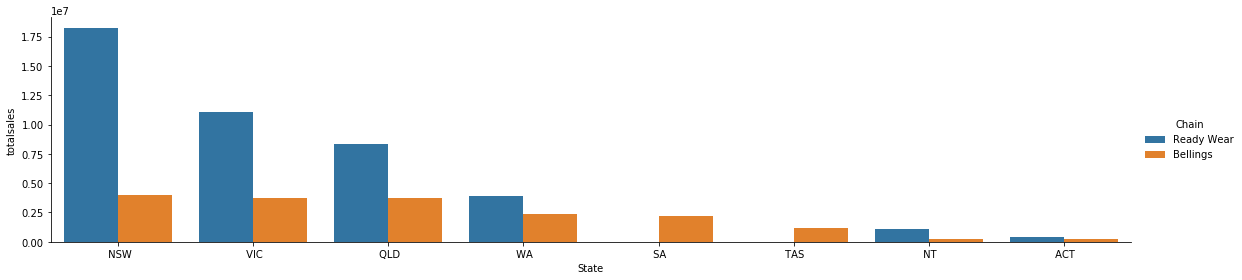

In [15]:
g = sns.catplot("State", "totalsales",hue='Chain', data=df_state, kind="bar", height=4, aspect=4)  

#### From the graph, we can see that the states of NSW has the highest sales in Ready Wear, and NSW, VIC, and QLD have the highset sales in Bellings. 

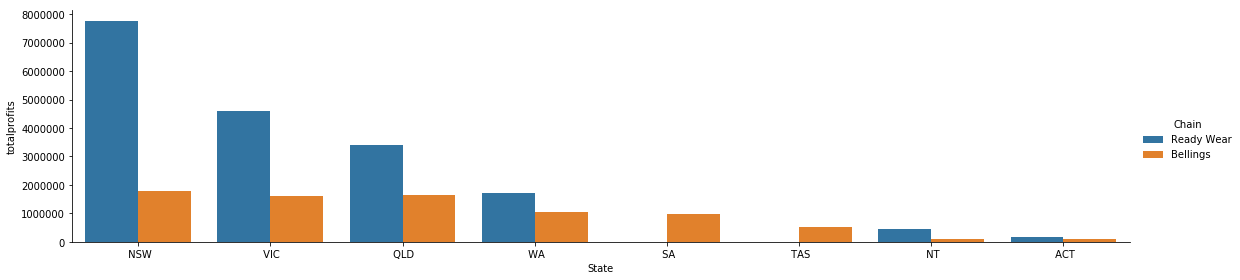

In [16]:
g = sns.catplot("State", "totalprofits",hue='Chain', data=df_state.sort_values(by='totalprofits', ascending=False), kind="bar", height=4, aspect=4)  

#### From the graph, we can see that the states of NSW has the highest gross profits in Ready Wear, and NSW, VIC, and QLD have the highset gross profits in Bellings. 

### Objective 2: Compare the Sales and gross profits generation performance of different categories.

In [17]:
# First, we need a table with columns: Categories, channel, total revenue grouped by categories and channels, and total gross profits
# grouped by categories and channels. We can get the table from "Transaction".
df_category = pd.read_sql("""SELECT Category,
Chain,
ROUND(SUM(Transaction.Total_Units * Transaction.Sale_Price),1) AS totalsales,
 ROUND(SUM(Transaction.Total_Units * (Transaction.Sale_Price - Transaction.Cost_Price)),1) AS totalprofits
FROM Transaction
GROUP BY Category,Chain
ORDER BY SUM(Transaction.Total_Units * Transaction.Sale_Price) DESC""",conn)

In [18]:
df_category

,Category,Chain,totalsales,totalprofits
0,Home,Ready Wear,7434650.3,2468966.1
1,Mens,Ready Wear,7000597.8,3272773.3
2,Kids,Ready Wear,6057019.6,2623282.7
3,Shoes,Ready Wear,5952436.9,2411581.6
4,Mens,Bellings,5140591.1,2303412.9
5,Juniors,Ready Wear,4770393.8,2186896.2
6,Womens,Ready Wear,4567001.8,2066874.6
7,Shoes,Bellings,3824968.2,1549115.5
8,Juniors,Bellings,3390309.2,1545828.3
9,Accessories,Ready Wear,2324014.1,1144793.5


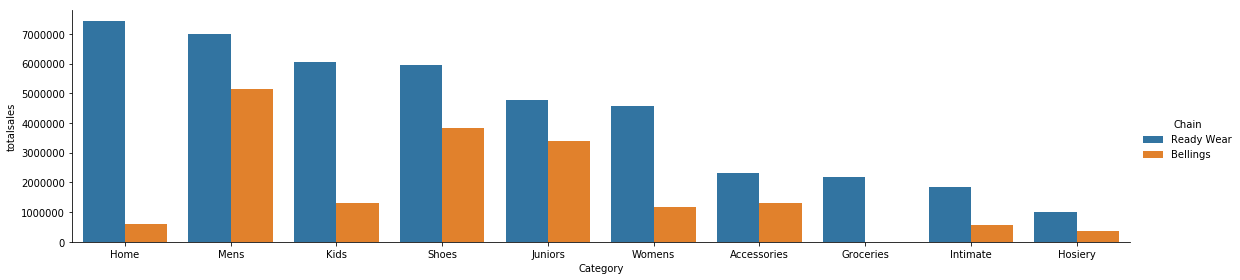

In [19]:
g = sns.catplot("Category", "totalsales",hue='Chain', data=df_category, kind="bar", height=4, aspect=4)  

#### From the graph, we can see that Home has the most sales from Ready Wear, Mens has the most sales from Bellings.

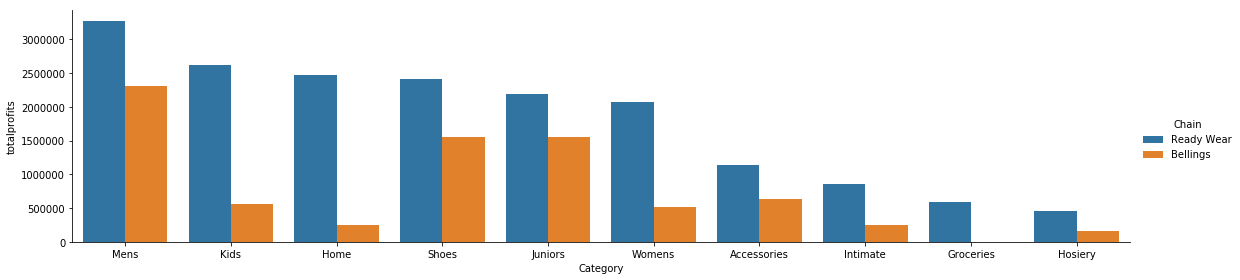

In [20]:
g = sns.catplot("Category", "totalprofits",hue='Chain', data=df_category.sort_values(by='totalprofits', ascending=False), kind="bar", height=4, aspect=4)  

#### From the graph, we can see that Mens earns the most profits from both chains.

### Find out the manager with highest sales, gross profits, and ROI. Also, we will investigate the relationship between sales and ROI

In [21]:
# First, we need a table with columns: Manager, total revenue grouped by states and channels, total gross profits
# grouped by states and channels, and ROI defined as (Total gross profits)/(Total cost).
# We can get the table from "Transaction" and "Suburb".

df_manager = pd.read_sql("""SELECT Suburb.Manager AS Manager,

ROUND(SUM(Transaction.Total_Units * Transaction.Sale_Price),1) AS totalsales,

 ROUND(SUM(Transaction.Total_Units * (Transaction.Sale_Price - Transaction.Cost_Price)),1) AS totalprofits,
 ROUND((totalprofits/ROUND(SUM(Transaction.Total_Units * Transaction.Cost_Price),1)),2) AS ROI
 
FROM Transaction
LEFT JOIN Suburb
on Transaction.Postcode = Suburb.Postcode
GROUP BY Manager
ORDER BY SUM(Transaction.Total_Units * Transaction.Sale_Price) DESC""",conn)

In [22]:
df_manager

,Manager,totalsales,totalprofits,ROI
0,John Gardner,5620719.8,2383642.0,0.74
1,Jeremy Garcia,5125896.8,2166847.2,0.73
2,Lillian Pruitt,5045470.7,2223115.6,0.79
3,Rachael Long,4945835.8,2074410.2,0.72
4,Jerry Fulton,4727111.3,1995813.0,0.73
5,Terri Wright,3944390.3,1586412.1,0.67
6,George Chester,3941595.2,1691066.0,0.75
7,Brian Hubbard,3873699.6,1604052.6,0.71
8,Miles Hammond,3203930.5,1379446.7,0.76
9,Claire Bridges,3168789.8,1369931.0,0.76


In [23]:
# Names are too long for visualization, let's simplify it by preserving only First name + initial of Last name
def name(x):
    return x.split(' ')[0]+x.split(' ')[1][0]

In [24]:
name('Denton Li')

'DentonL'

In [25]:
df_manager['Manager'] = df_manager['Manager'].apply(name)

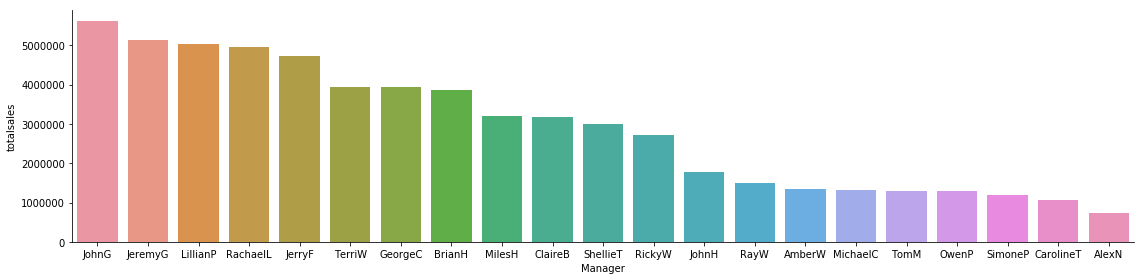

In [26]:
g = sns.catplot("Manager", "totalsales", data=df_manager, kind="bar", height=4, aspect=4)  

#### John Gardner makes the most sales

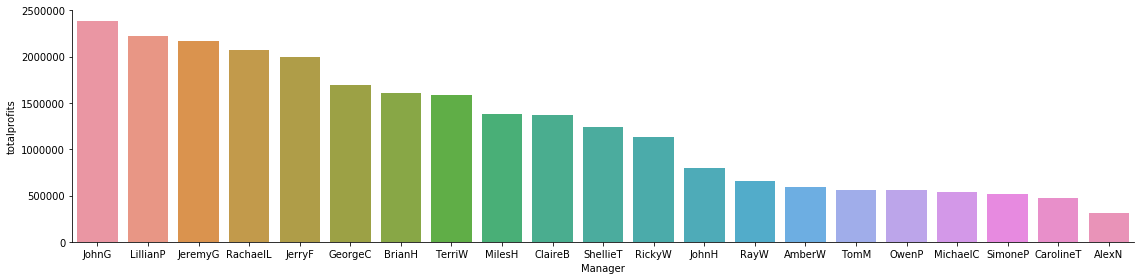

In [27]:
g = sns.catplot("Manager", "totalprofits", data=df_manager.sort_values(by='totalprofits', ascending=False), kind="bar", height=4, aspect=4)  

#### John Gardner also makes the most profits

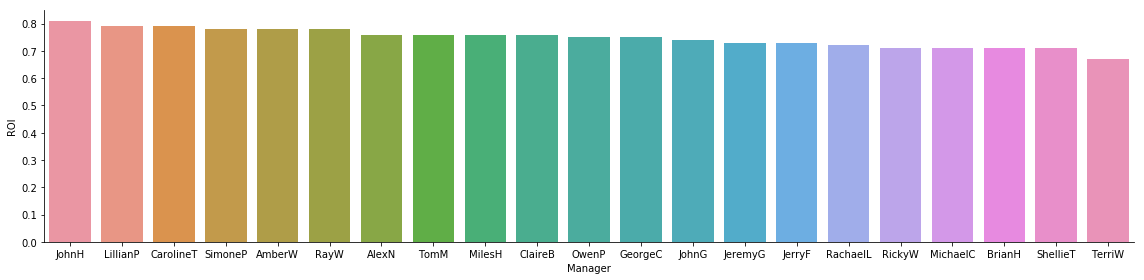

In [28]:
g = sns.catplot("Manager", "ROI", data=df_manager.sort_values(by='ROI', ascending=False), kind="bar", height=4, aspect=4)  

#### John Harper is the most efficient

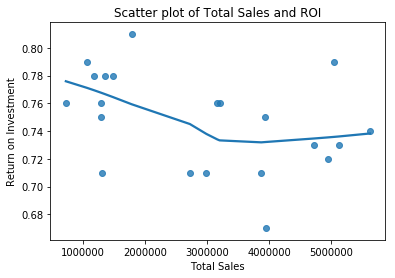

In [29]:
sns.regplot(data = df_manager,x='totalsales',y='ROI',lowess=True)
plt.xlabel('Total Sales')
plt.ylabel('Return on Investment')
plt.title('Scatter plot of Total Sales and ROI')
plt.show()

#### As total sales amount goes up, ROI generally goes down, so it is not easy to maintain a high ROI while increasing sales

### Objective 4: Find out the trend and seasonality of total sales and total gross profits.

In [30]:
# First we need to build a table with Date, total sales, and total gross profits.
# We can get the table from "Transaction".
df_Time = pd.read_sql("""SELECT Transaction.Date,

ROUND(SUM(Transaction.Total_Units * Transaction.Sale_Price),1) AS totalsales,

ROUND(SUM(Transaction.Total_Units * (Transaction.Sale_Price - Transaction.Cost_Price)),1) AS totalprofits
 
FROM Transaction

GROUP BY Date
ORDER BY Date""", conn)

In [31]:
df_Time

,Date,totalsales,totalprofits
0,2016-01-01,2141301.6,746215.2
1,2016-02-01,2461253.2,968277.4
2,2016-03-01,2725101.9,1149131.0
3,2016-04-01,3207172.0,1436303.1
4,2016-05-01,2460736.6,1044024.4
5,2016-06-01,2744256.3,1170825.5
6,2016-07-01,3183413.0,1259860.9
7,2016-08-01,3440382.9,1537606.2
8,2016-09-01,3777031.9,1747985.0
9,2016-10-01,2645544.8,1209950.4


(array([735964., 736024., 736085., 736146., 736208., 736269., 736330.,
        736389., 736450., 736511.]), <a list of 10 Text xticklabel objects>)

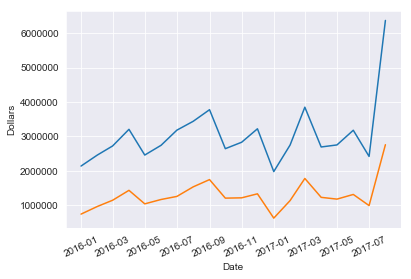

In [32]:
sns.set_style("darkgrid")
sns.lineplot(x = "Date", y = "totalsales", data = df_Time) 
sns.lineplot(x = "Date", y = "totalprofits", data = df_Time) 
plt.ylabel("Dollars") 
plt.xticks(rotation = 25)

### From the time plot we can see that for each year, the sales peaks in March and september, and reaches the vally in May. Finally, there is an upward trend.

C:\Users\30523\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\30523\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 1152x864 with 0 Axes>

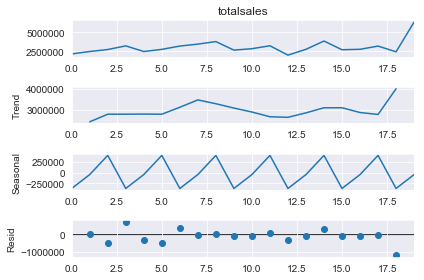

In [33]:
import statsmodels.api as sm
# See if the multiplicative model fits
res = sm.tsa.seasonal_decompose(df_Time.totalsales,freq=3,model="additive")
plt.figure(figsize=(16,12))
fig = res.plot()
fig.show()

### It seems like a log of any number lower than 12 cannot explain both the trend and seasonality well.